## Importing, loading data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

In [2]:
drugs_padel = pd.read_csv('../../data/fda_approved_datasets/fda_approved_with_descriptors/fda_approved_padel.csv')
print(f'The dataframe has {drugs_padel.shape[0]} molecules and {drugs_padel.shape[1]} descriptors. Some of the columns are:\n{drugs_padel.columns}')

The dataframe has 1895 molecules and 1890 descriptors. Some of the columns are:
Index(['name', 'chembl_id', 'clean_smiles', 'first_approval_year',
       'indication_class', 'molecule_type', 'withdrawn_flag',
       'therapeutic_flag', 'polymer_flag', 'inorganic_flag',
       ...
       'P1s', 'P2s', 'E1s', 'E2s', 'E3s', 'Ts', 'As', 'Vs', 'Ks', 'Ds'],
      dtype='object', length=1890)


Excluding the variables from the original curated dataset, they are not going to be needed right now for processing of the descriptors.

In [17]:
columns_to_exclude = ['name', 'chembl_id', 'clean_smiles','first_approval_year', 'indication_class', 'therapeutic_flag', 'polymer_flag', 
                      'inorganic_flag', 'natural_product_flag', 'oral', 'parenteral', 'topical','ROMol', 'withdrawn_flag']

for column in drugs_padel.columns:
    if column in columns_to_exclude:
        drugs_padel = drugs_padel.drop(columns=[column])

print(f'After dropping the columns oral, inornagic, therapeutic and other flags: {drugs_padel.shape}')

After dropping the columns oral, inornagic, therapeutic and other flags: (1895, 1876)


## Preprocess of the data

There is a significant amount of missing data calculated from PaDeL descriptors. 

It is a common problem arising from employing older descriptor computation softwares.

In [18]:
descriptor_has_null = []
[descriptor_has_null.append(column) for column in drugs_padel.columns if drugs_padel[column].isnull().sum() > 0]

number_of_null = []
[number_of_null.append(drugs_padel[column].isnull().sum()) for column in drugs_padel.columns]

print(f'There are {len(descriptor_has_null)} descriptors that has at least one NaN entry.\
      \nThe mean of null values in the matrix of descriptors is: {pd.Series(number_of_null).mean():.1f}')

There are 1875 descriptors that has at least one NaN entry.      
The mean of null values in the matrix of descriptors is: 121.4


In [19]:
drugs_padel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1895 entries, 0 to 1894
Columns: 1876 entries, molecule_type to Ds
dtypes: float64(1875), object(1)
memory usage: 27.1+ MB


Observations: 
* All of the descriptors have at least on missing value. 
* There is room for a datavis. A heatmap of missing values would be excellent on this situation.

### Heatmap of missing values

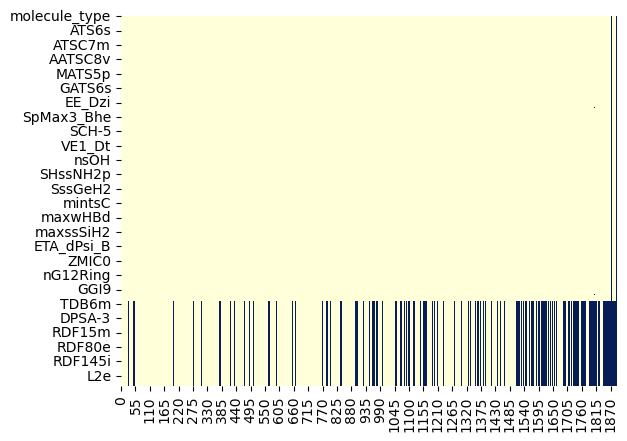

In [20]:
g = sns.heatmap(drugs_padel.isna().transpose(), cmap='YlGnBu', cbar=False)
